# Importação de biblitecas

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns 

%matplotlib inline

# SCIKIT-LEARN

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import warnings   # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

from dfply import *  # para importar os comandos da biblioteca dfply

import scikitplot as skplt

from dtreeviz.trees import *




np.random.seed(42)  # semente de aleatoriedade

In [ ]:
"""O conjunto de dados são do Instituto Nacional de Diabetes e Doenças Digestivas e Renais do 
ministerio da saúde da India. O objetivo do conjunto de dados é prever diagnosticamente se 
um paciente tem ou não tem diabetes, com base em diagnóstico incluídas no conjunto de dados. 
Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. 
Em particular, todos os pacientes aqui são mulheres com no mínimo 21 anos de idade e com ascendência indígena Pima.

Os conjuntos de dados estão divididos em variáveis ​​preditoras 
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) e a classes(Outcome)."""

# Carregamento dos dados

In [3]:
#Carregamento do banco de dados
dataset = pd.read_csv("https://drive.google.com/uc?export=download&id=1a6V3BG96SQCGAhHiVYJCZE7wrqVhCW-E")

In [4]:
#Mostrado os dados
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Visualização
dataset.shape

(768, 9)

# Análise dos dados

In [6]:
#Informações basicas sobre os dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Vericação da existência de valores nulos
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Descrição  estatisticas geral
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Visualização gráfica dos dados

In [9]:
np.unique(dataset["Outcome"], return_counts=True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

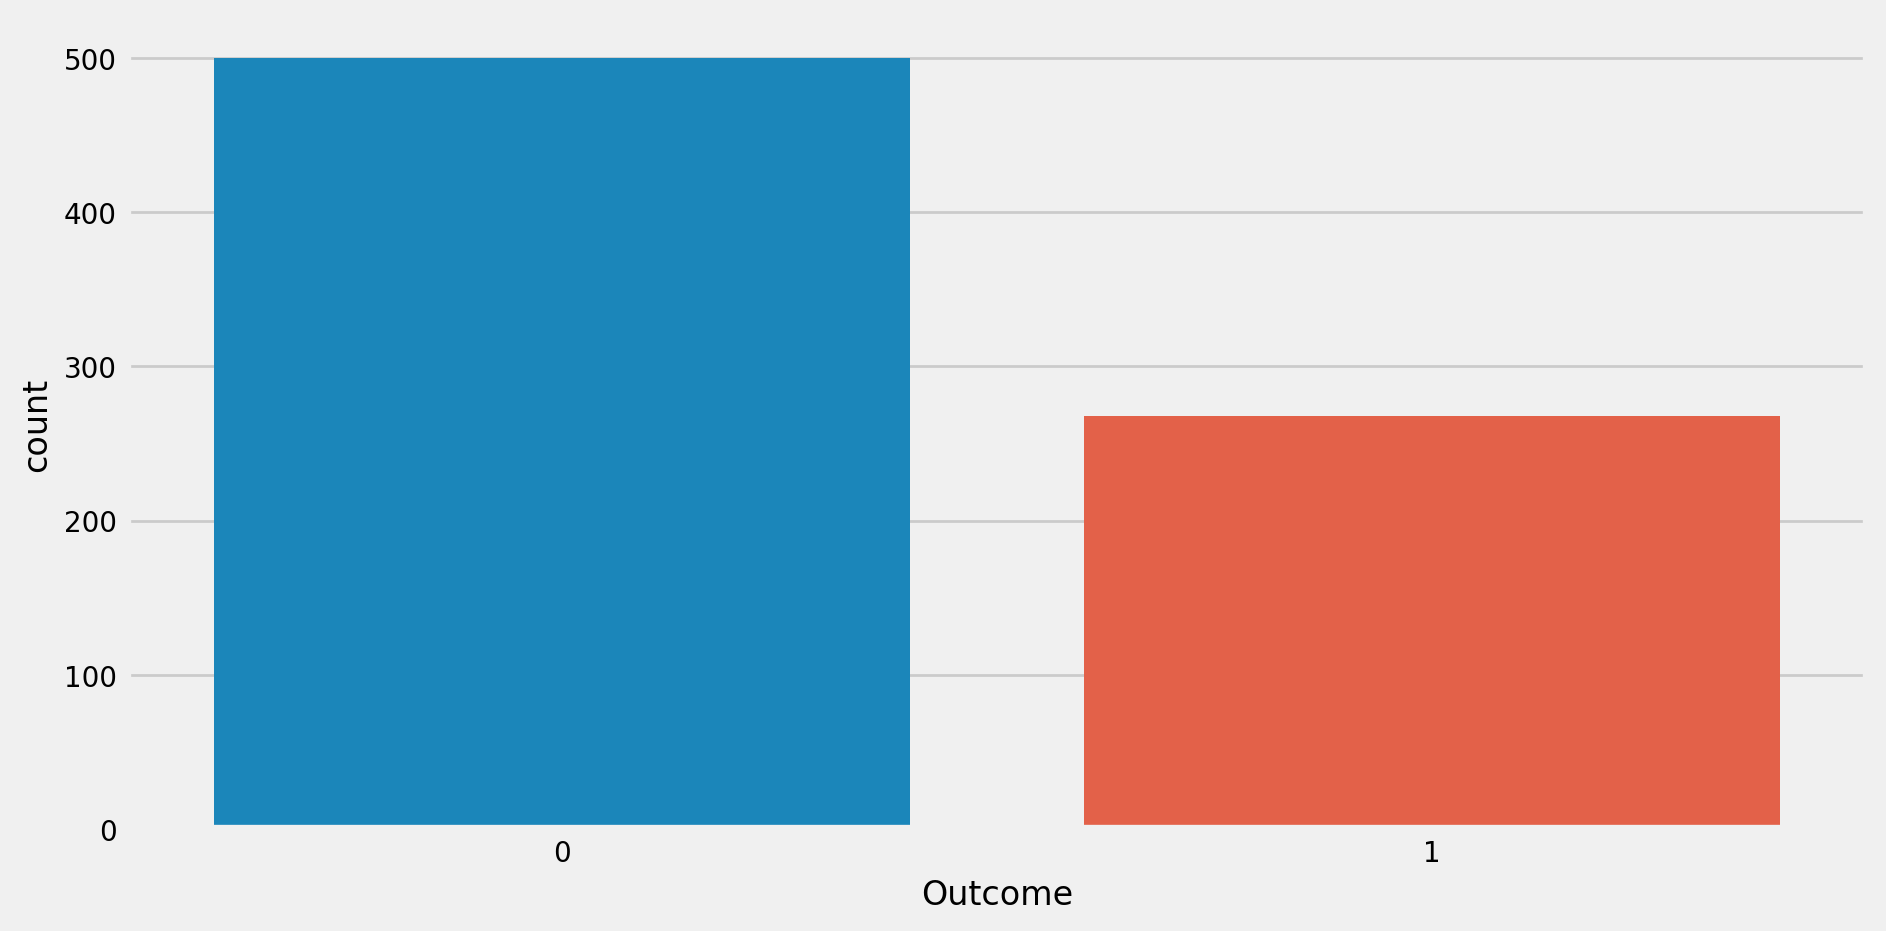

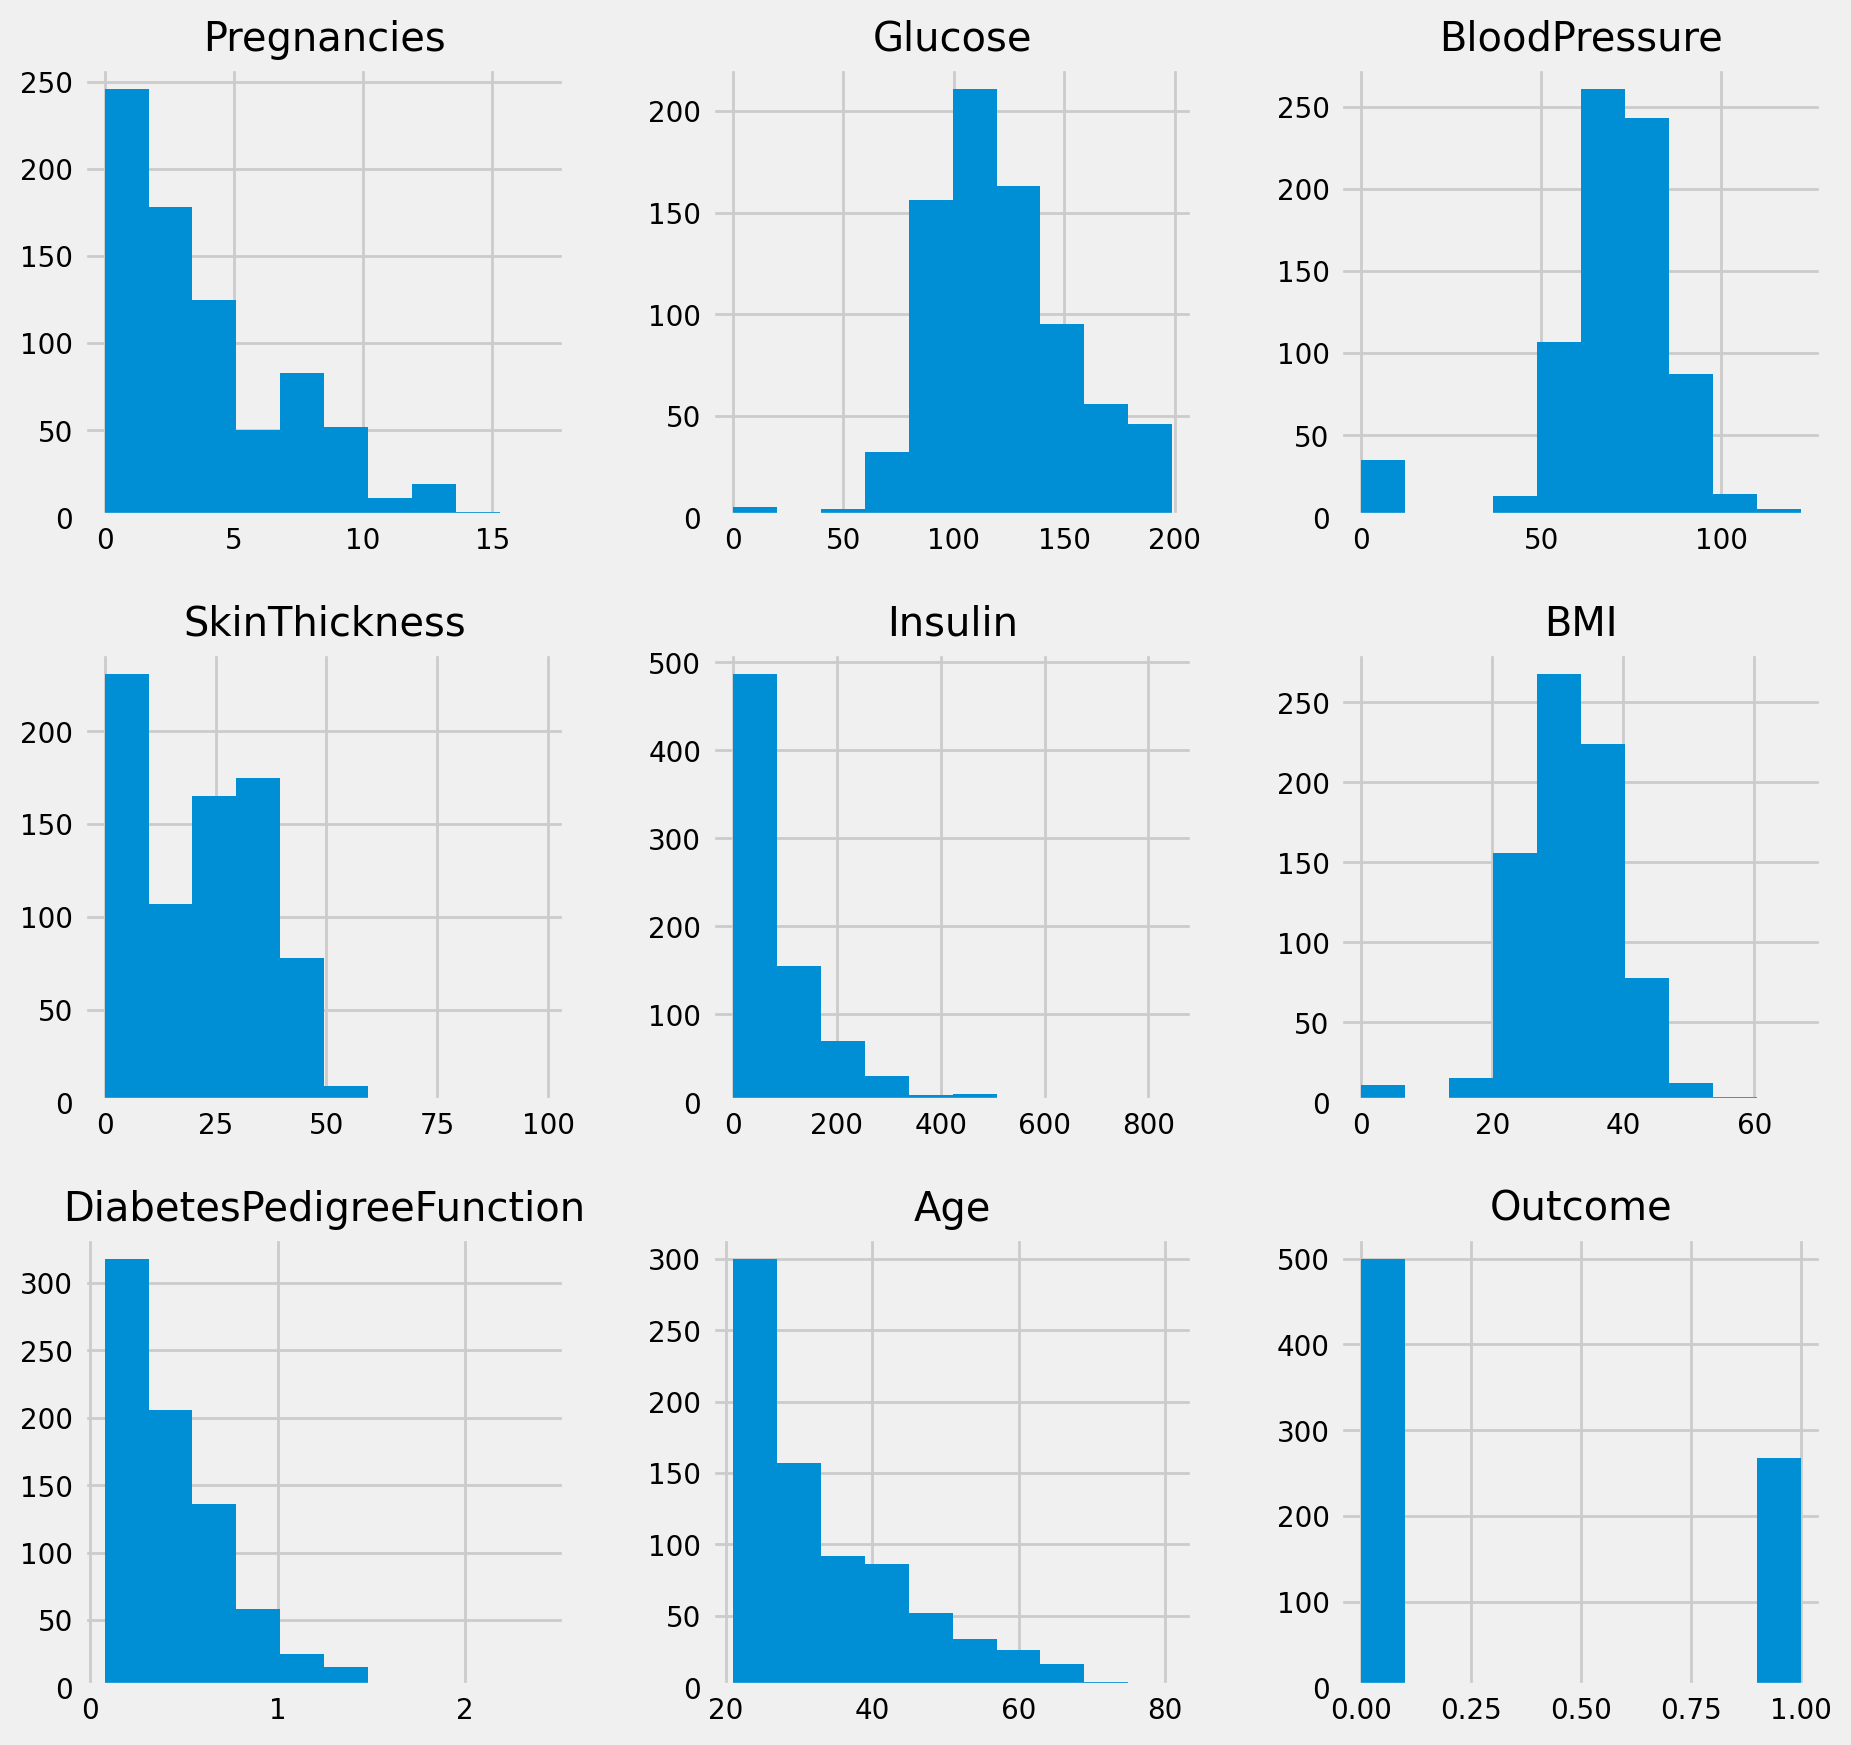

In [33]:
sns.countplot(x = dataset.Outcome);
plotar = dataset.hist(figsize = (10,10))

# Divisão de predisores e classe

In [11]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
var_pred = dataset.drop(['Outcome'], axis = 1)

In [13]:
classe = dataset.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], axis = 1)

In [14]:
var_pred.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
classe.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# Divisão de treino e teste

In [16]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(var_pred, classe, test_size = 0.3, random_state = 42)

In [17]:
X_train.columns
X_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
X_train_columns = X_train.columns
X_test_columns = X_test.columns

In [19]:
# Visualização dos dados de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537, 1), (231, 1))

# Visualização de dados inconsistente

In [20]:
# Conversando com dois médicos fiquei sabendo que certas variaveis  seus valoes  não podem ser zero como:(Glucose, BloodPressure,SkinThickness,Insulin, BMI) 
# Portanto faz-se necessario fazer a imputação, lembrando que existem varias maneiras de imputação mas nesse trabalho vou usar a média 
X_train[X_train["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
182,1,0,74,20,23,27.7,0.299,21
342,1,0,68,35,0,32.0,0.389,22
75,1,0,48,20,0,24.7,0.140,22
349,5,0,80,32,0,41.0,0.346,37
502,6,0,68,41,0,39.0,0.727,41


In [21]:
X_train[X_train["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
266,0,138,0,0,0,36.3,0.933,25
643,4,90,0,0,0,28.0,0.610,31
15,7,100,0,0,0,30.0,0.484,32
589,0,73,0,0,0,21.1,0.342,25
453,2,119,0,0,0,19.6,0.832,72
426,0,94,0,0,0,0.0,0.256,25
332,1,180,0,0,0,43.3,0.282,41
522,6,114,0,0,0,0.0,0.189,26
533,6,91,0,0,0,29.8,0.501,31
261,3,141,0,0,0,30.0,0.761,27


In [22]:
X_train[X_train["SkinThickness"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
266,0,138,0,0,0,36.3,0.933,25
626,0,125,68,0,0,24.7,0.206,21
61,8,133,72,0,0,32.9,0.270,39
632,2,111,60,0,0,26.2,0.343,23
...,...,...,...,...,...,...,...,...
21,8,99,84,0,0,35.4,0.388,50
343,5,122,86,0,0,34.7,0.290,33
106,1,96,122,0,0,22.4,0.207,27
435,0,141,0,0,0,42.4,0.205,29


In [23]:
X_train[X_train["Insulin"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
266,0,138,0,0,0,36.3,0.933,25
626,0,125,68,0,0,24.7,0.206,21
83,0,101,65,28,0,24.6,0.237,22
61,8,133,72,0,0,32.9,0.270,39
...,...,...,...,...,...,...,...,...
121,6,111,64,39,0,34.2,0.260,24
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [24]:
X_train[X_train["BMI"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
426,0,94,0,0,0,0.0,0.256,25
9,8,125,96,0,0,0.0,0.232,54
522,6,114,0,0,0,0.0,0.189,26
371,0,118,64,23,89,0.0,1.731,21
684,5,136,82,0,0,0.0,0.640,69


# Imputação

In [25]:
# O valor zero nas variaveis (Glucose, BloodPressure,SkinThickness,Insulin, BMI) foram substituido pelas suas média
# De salientar ainda que existem outros métodos para imputação 
X_train.loc[X_train["Glucose"] == 0, "Glucose"]  = X_train.Glucose.mean()
X_train.loc[X_train["BloodPressure"] == 0, "BloodPressure"]  = X_train.BloodPressure.mean()
X_train.loc[X_train["SkinThickness"] == 0, "SkinThickness"]  = X_train.SkinThickness.mean()
X_train.loc[X_train["Insulin"] == 0, "Insulin"]  = X_train.Insulin.mean()
X_train.loc[X_train["BMI"] == 0, "BMI"]  = X_train.BMI.mean()
X_test.loc[X_test["BloodPressure"] == 0, "BloodPressure"]  = X_train.BloodPressure.mean()
X_test.loc[X_test["SkinThickness"] == 0, "SkinThickness"]  = X_train.SkinThickness.mean()
X_test.loc[X_test["Insulin"] == 0, "Insulin"]  = X_train.Insulin.mean()
X_test.loc[X_test["BMI"] == 0, "BMI"]  = X_train.BMI.mean()

# Padronização

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train = scaler.transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [31]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [32]:
# Visualização dos dados do treino já padronizado
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.84,-0.90,-1.00,-0.90,-0.65,-1.20,-0.61,-0.95
1,0.39,-0.56,-0.01,0.29,2.22,0.66,-0.91,-0.43
2,-1.14,0.43,-0.34,1.70,1.41,1.44,-0.31,-0.78
3,0.08,0.30,-0.34,-0.57,0.51,0.12,-0.91,-0.43
4,-0.84,-0.63,-3.45,1.27,-0.38,1.58,-0.84,-0.01
